In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.shape

(1453, 15)

In [ ]:
df.info

<bound method DataFrame.info of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  
0         No         No            -3   61  Every three months  Female  
1         No         No            +2   51  Every three months  Female  
2        Yes         No            +1   62  Every three months  Female  
3         No        Yes            +4   69         Once a week  Female  
4        Yes         No            +2   49        Once a month    Male  
...      ...        ...           ...  ...                 ...     ...  
1448      No        Yes  I hate it!-5   47         Once a year    Male  
1449     Yes         No            +2   36         Once a week  Female  
1450      No         No            +3   52        Once a month  Female  
1451     Yes         No            +4   41  Every three months    Male  
1452      No        Yes            -3   30  Every three months    Male  

[1453 rows x 15 columns]>

In [ ]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
print(df.isnull().sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [ ]:
# Data Cleaning
df['Like'] = df['Like'].replace({
    'I love it!+5': 5,
    'I hate it!-5': -5
})
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')
df['Like'] = df['Like'].fillna(df['Like'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Drop non-numeric columns for PCA and clustering
df.drop(columns=["Gender"], axis=1, inplace=True)

# Convert categorical columns to numeric
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Check the DataFrame after processing
print("Data after preprocessing:")
print(df.head())

Data after preprocessing:
   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like  Age  VisitFrequency  
0        0           0    -3   61               0  
1        0           0     2   51               0  
2        1           0     1   62               0  
3        0           1     4   69               4  
4        1           0     2   49               3  


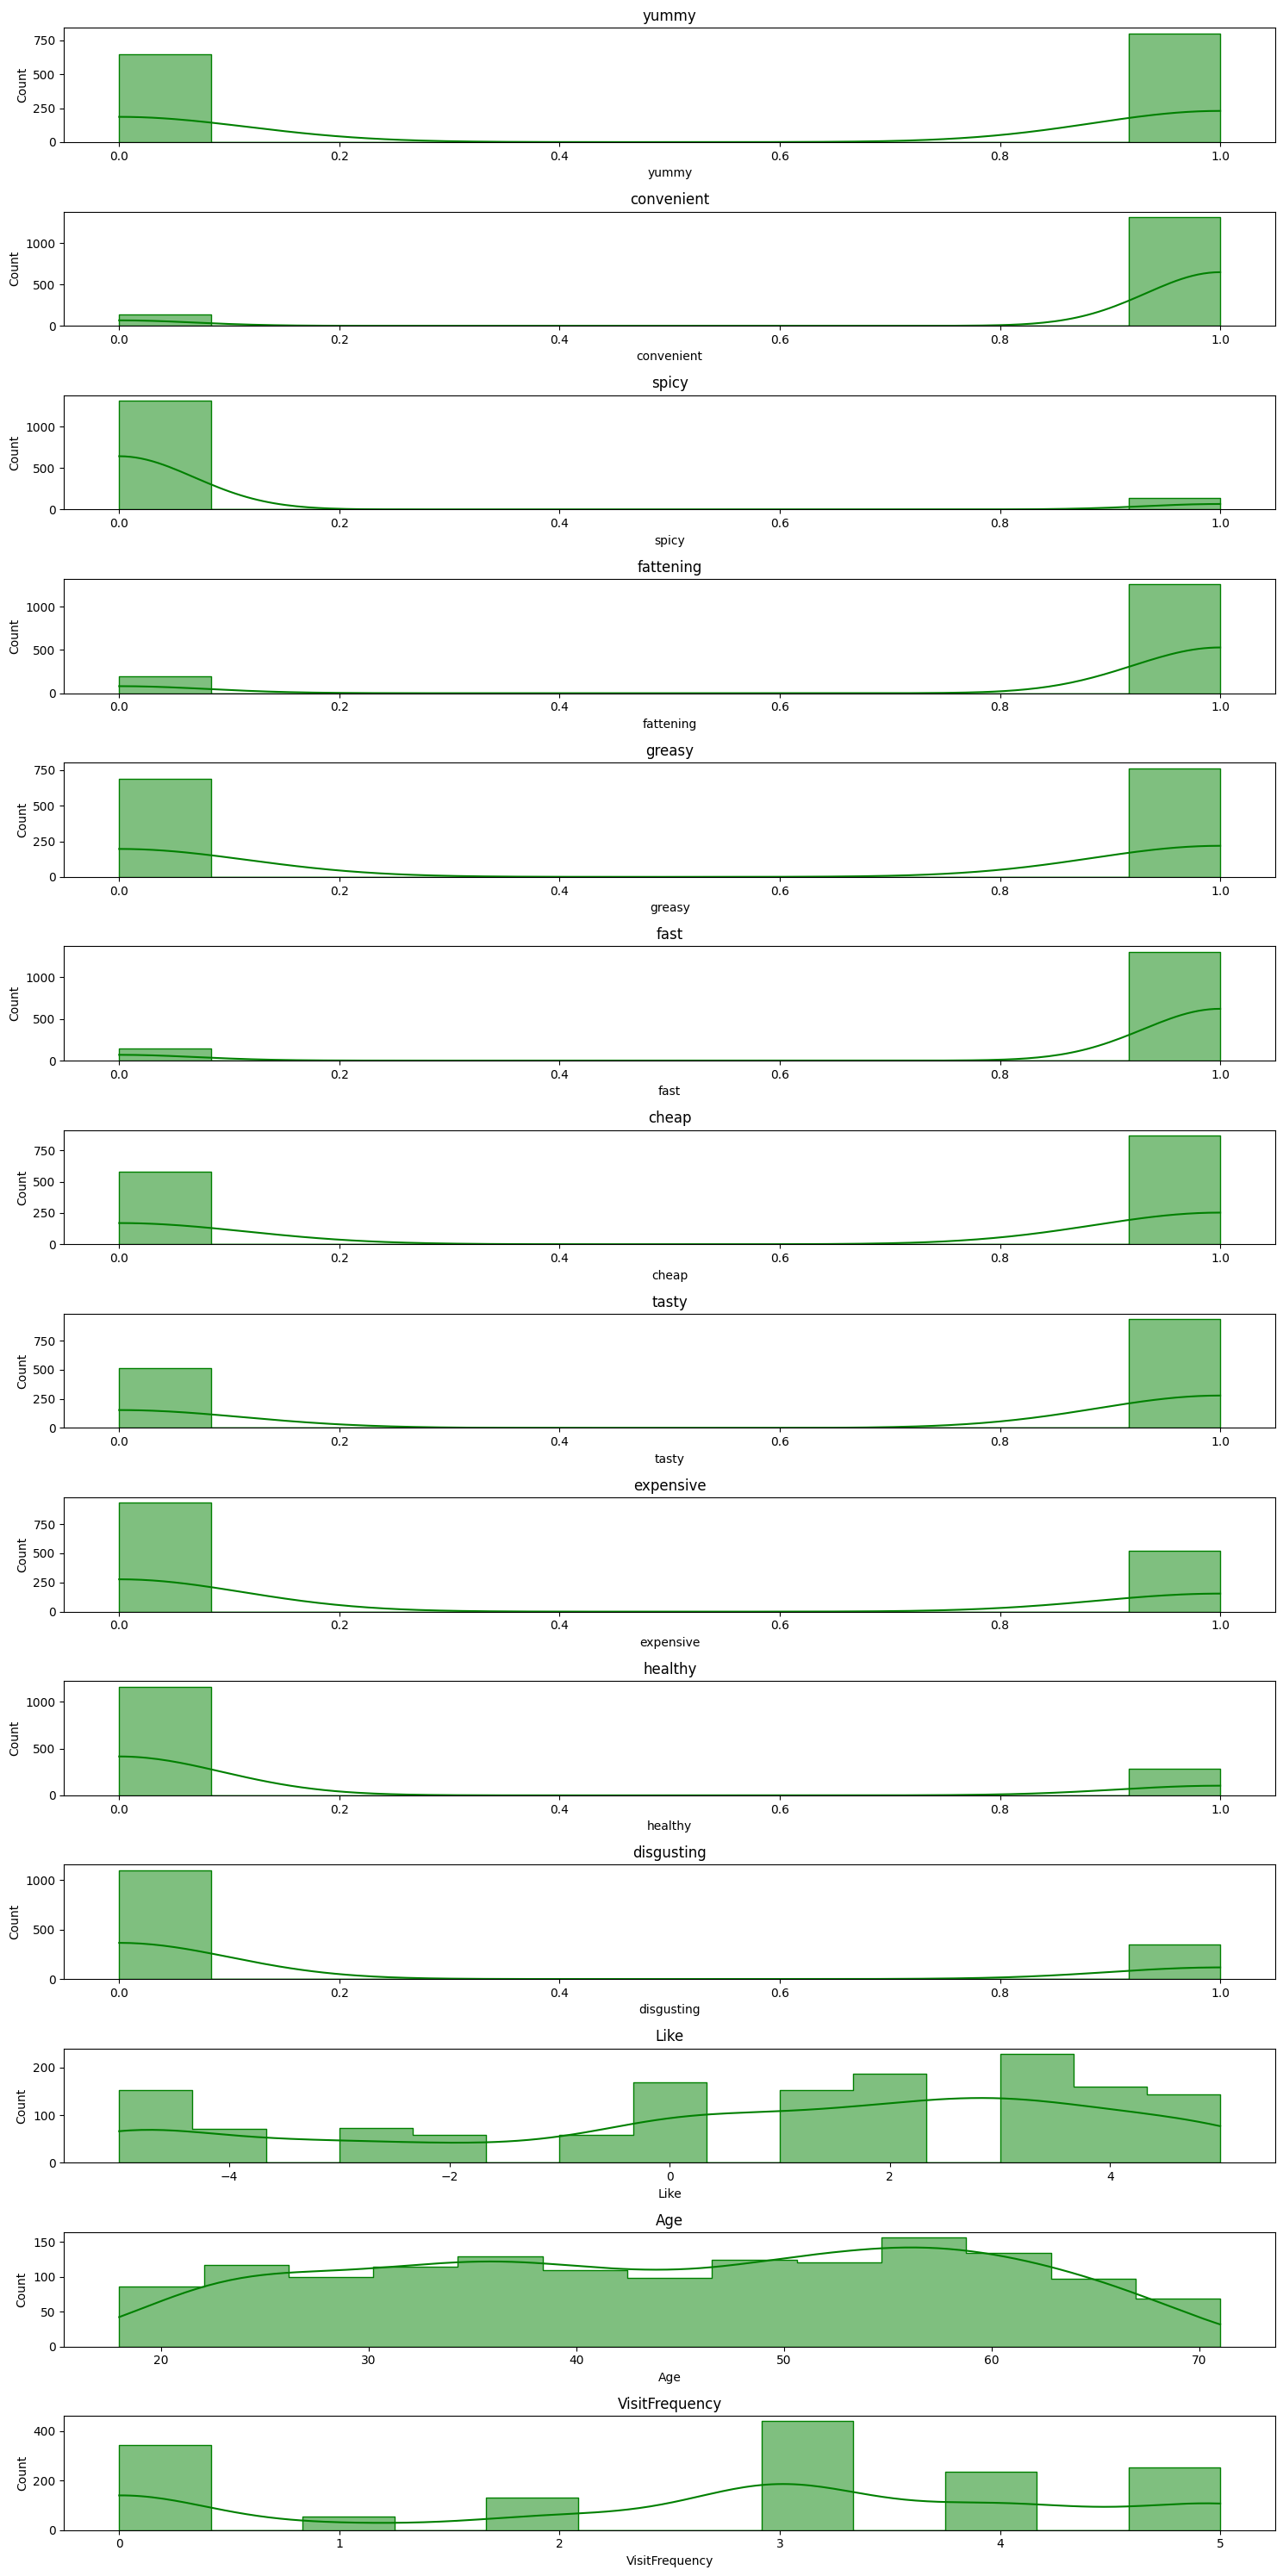

In [ ]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(df.columns):
    plt.subplot(len(df.columns), 1, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color='g', element='step')
    plt.title(col)
plt.tight_layout()
plt.show()

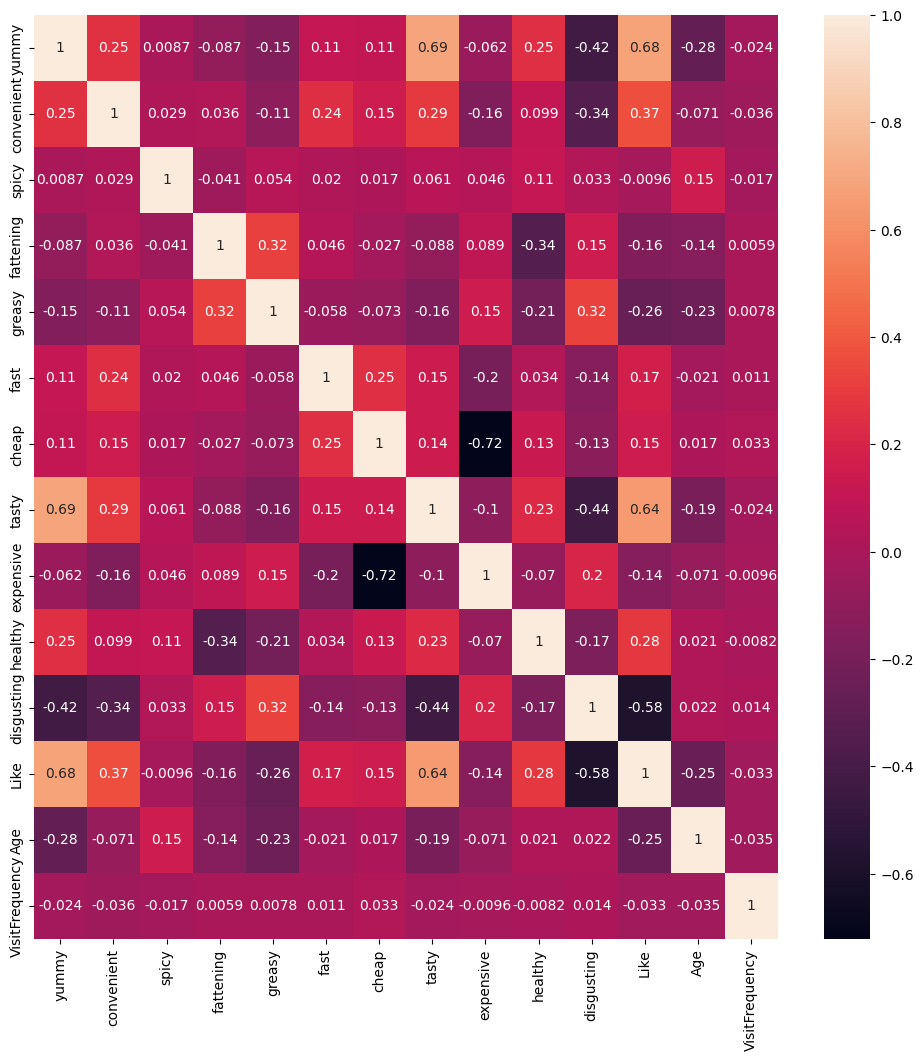

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# Scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

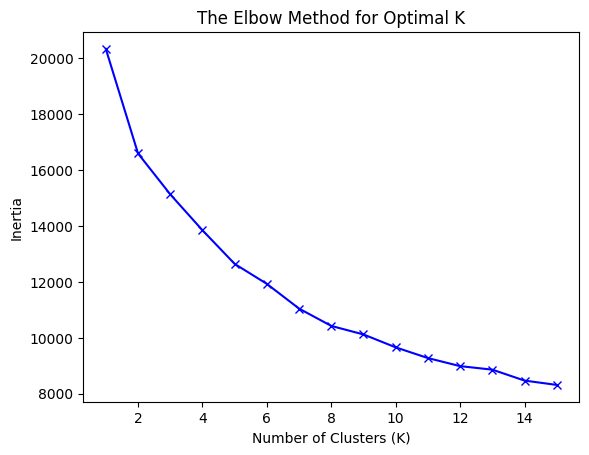

In [ ]:
# KMeans Clustering
inertia = []
max_clusters = min(15, scaled_df.shape[0])
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Elbow method plot
plt.plot(range(1, max_clusters + 1), inertia, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('The Elbow Method for Optimal K')
plt.show()

In [ ]:
# Fit KMeans with optimal clusters
optimal_k = 4  # Set this based on your elbow plot
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

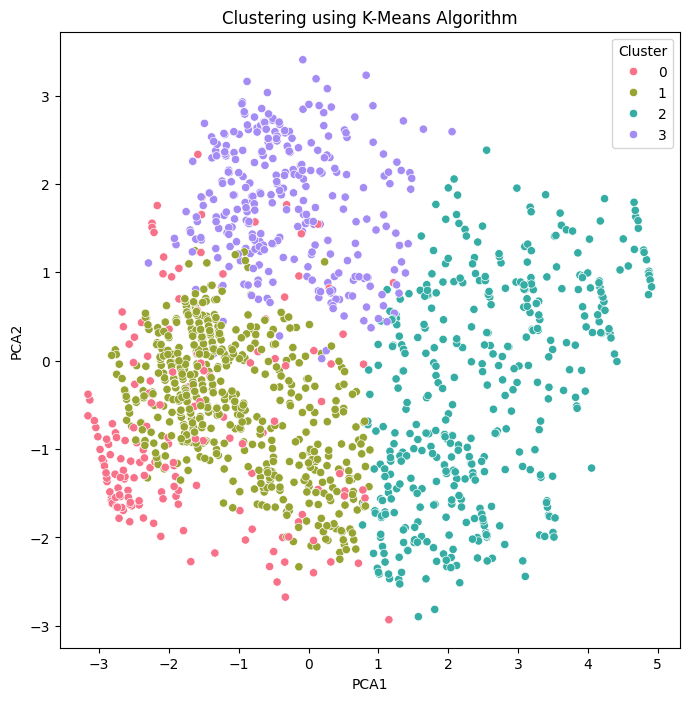

In [ ]:
# Combine PCA results with cluster labels
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)

# Plot clustering results
palette = sns.color_palette("husl", optimal_k)
plt.figure(figsize=(8, 8))
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_kmeans, palette=palette)
plt.title("Clustering using K-Means Algorithm")
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Get cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=df.columns)
cluster_centers_original = scaler.inverse_transform(cluster_centers)
cluster_centers_original_df = pd.DataFrame(data=cluster_centers_original, columns=df.columns)

print("Cluster Centers (Original Scale):")
print(cluster_centers_original_df)

Cluster Centers (Original Scale):
      yummy  convenient     spicy     fattening    greasy      fast     cheap  \
0  0.739645    0.946746  0.124260 -8.881784e-16  0.076923  0.934911  0.698225   
1  0.728546    0.989492  0.071804  1.000000e+00  0.457093  0.968476  0.935201   
2  0.014851    0.722772  0.086634  9.480198e-01  0.735149  0.804455  0.450495   
3  0.828479    0.977346  0.126214  9.902913e-01  0.627832  0.880259  0.116505   

      tasty  expensive   healthy  disgusting      Like        Age  \
0  0.828402   0.201183  0.621302    0.029586  2.757396  49.928994   
1  0.858144   0.003503  0.199650    0.056042  2.138354  42.935201   
2  0.084158   0.497525  0.037129    0.688119 -3.069307  49.383663   
3  0.880259   0.915858  0.177994    0.122977  2.207120  38.530744   

   VisitFrequency  
0        2.579882  
1        2.607706  
2        2.811881  
3        2.498382  


In [ ]:
# Append cluster labels to original DataFrame
cluster_df = pd.concat([df, pd.DataFrame({"Cluster": kmeans_model.labels_})], axis=1)

print("Cluster Counts:")
print(cluster_df["Cluster"].value_counts())

Cluster Counts:
Cluster
1    571
2    404
3    309
0    169
Name: count, dtype: int64


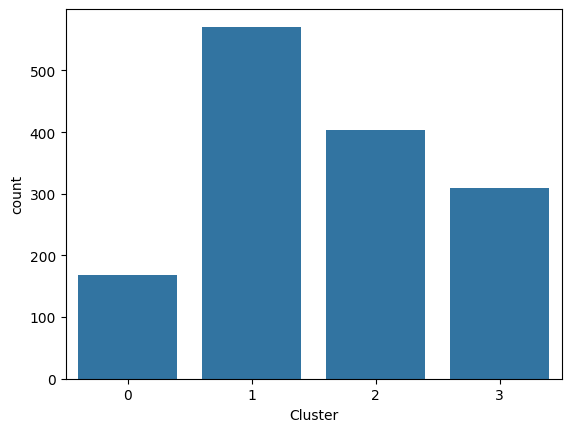

In [ ]:
# Plot cluster distribution
sns.countplot(x='Cluster', data=cluster_df)
plt.show()

# Prepare data for classification
X = cluster_df.drop(['Cluster'], axis=1)
y = cluster_df[['Cluster']]

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9541284403669725
Confusion Matrix:
 [[ 46   0   3   0]
 [  0 156   3   0]
 [  1   4 121   5]
 [  0   2   2  93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        49
           1       0.96      0.98      0.97       159
           2       0.94      0.92      0.93       131
           3       0.95      0.96      0.95        97

    accuracy                           0.95       436
   macro avg       0.96      0.95      0.95       436
weighted avg       0.95      0.95      0.95       436



In [ ]:
# Save the model
import joblib
filename = 'final_model.sav'
joblib.dump(model, filename)

# Load and evaluate the model
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(f'Loaded Model Accuracy: {result * 100:.2f}%')

Loaded Model Accuracy: 95.41%


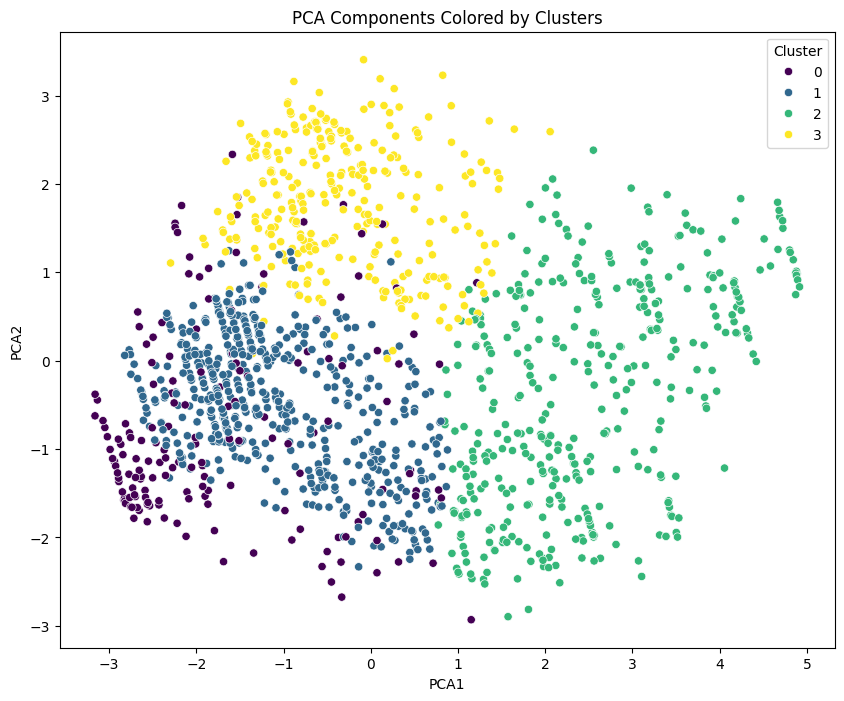

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of PCA components with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_kmeans, palette="viridis")
plt.title("PCA Components Colored by Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title='Cluster')
plt.show()


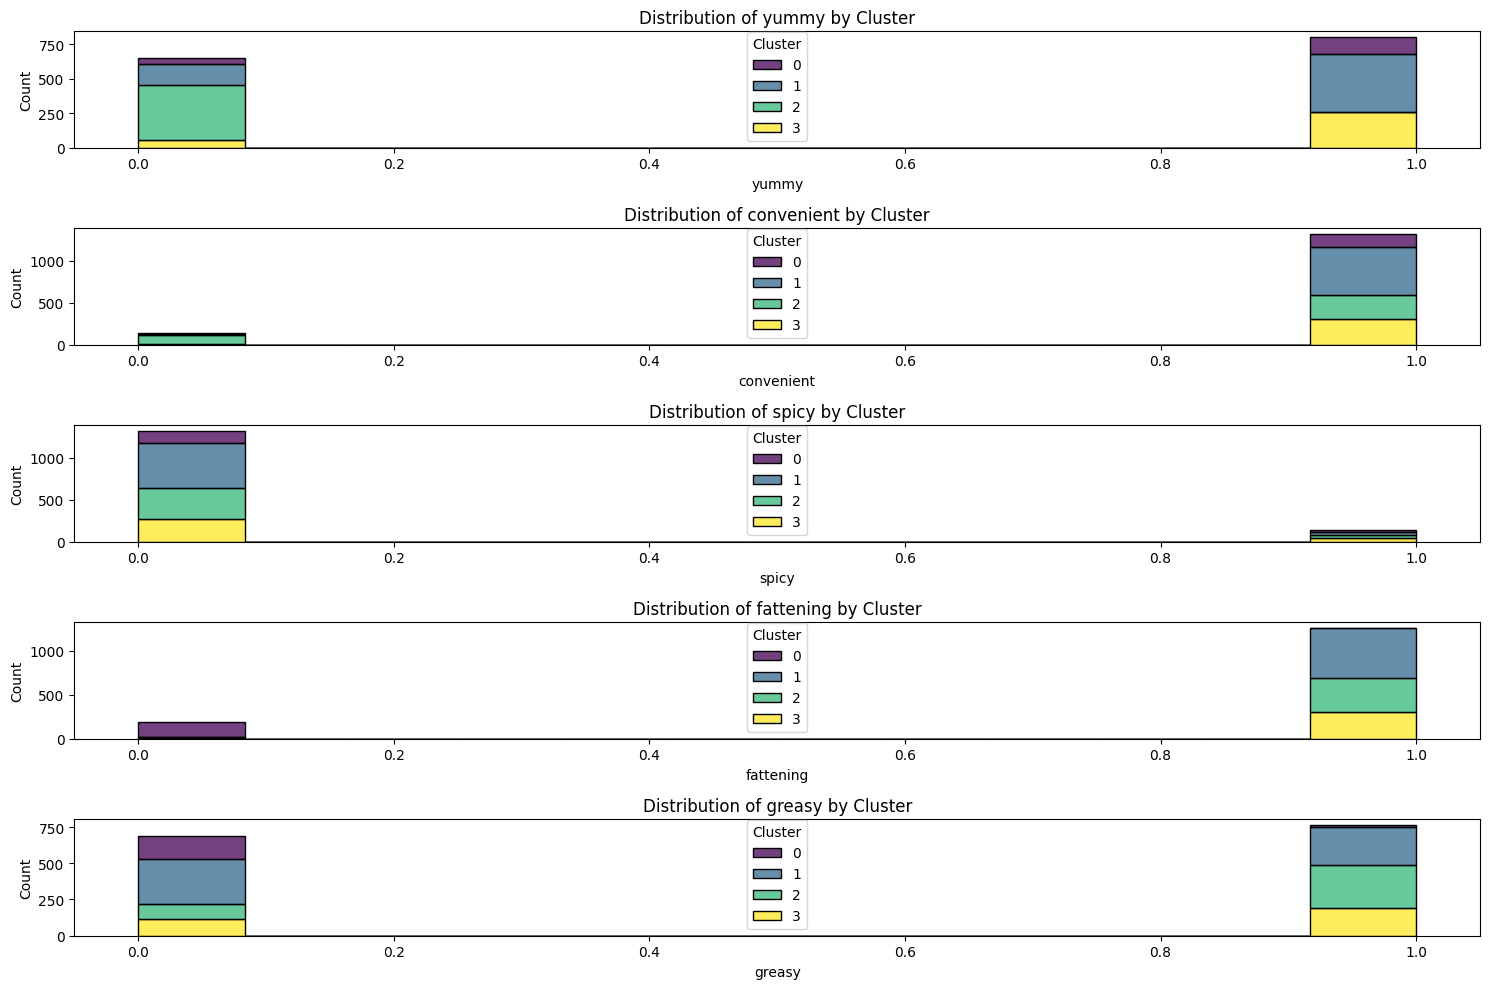

In [ ]:
# Plot distribution of key features by cluster
key_features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy']  # Update with your features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(len(key_features), 1, i + 1)
    sns.histplot(data=segment_profiles, x=feature, hue='Cluster', multiple='stack', palette="viridis")
    plt.title(f'Distribution of {feature} by Cluster')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg = silhouette_score(scaled_df, kmeans_model.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.161


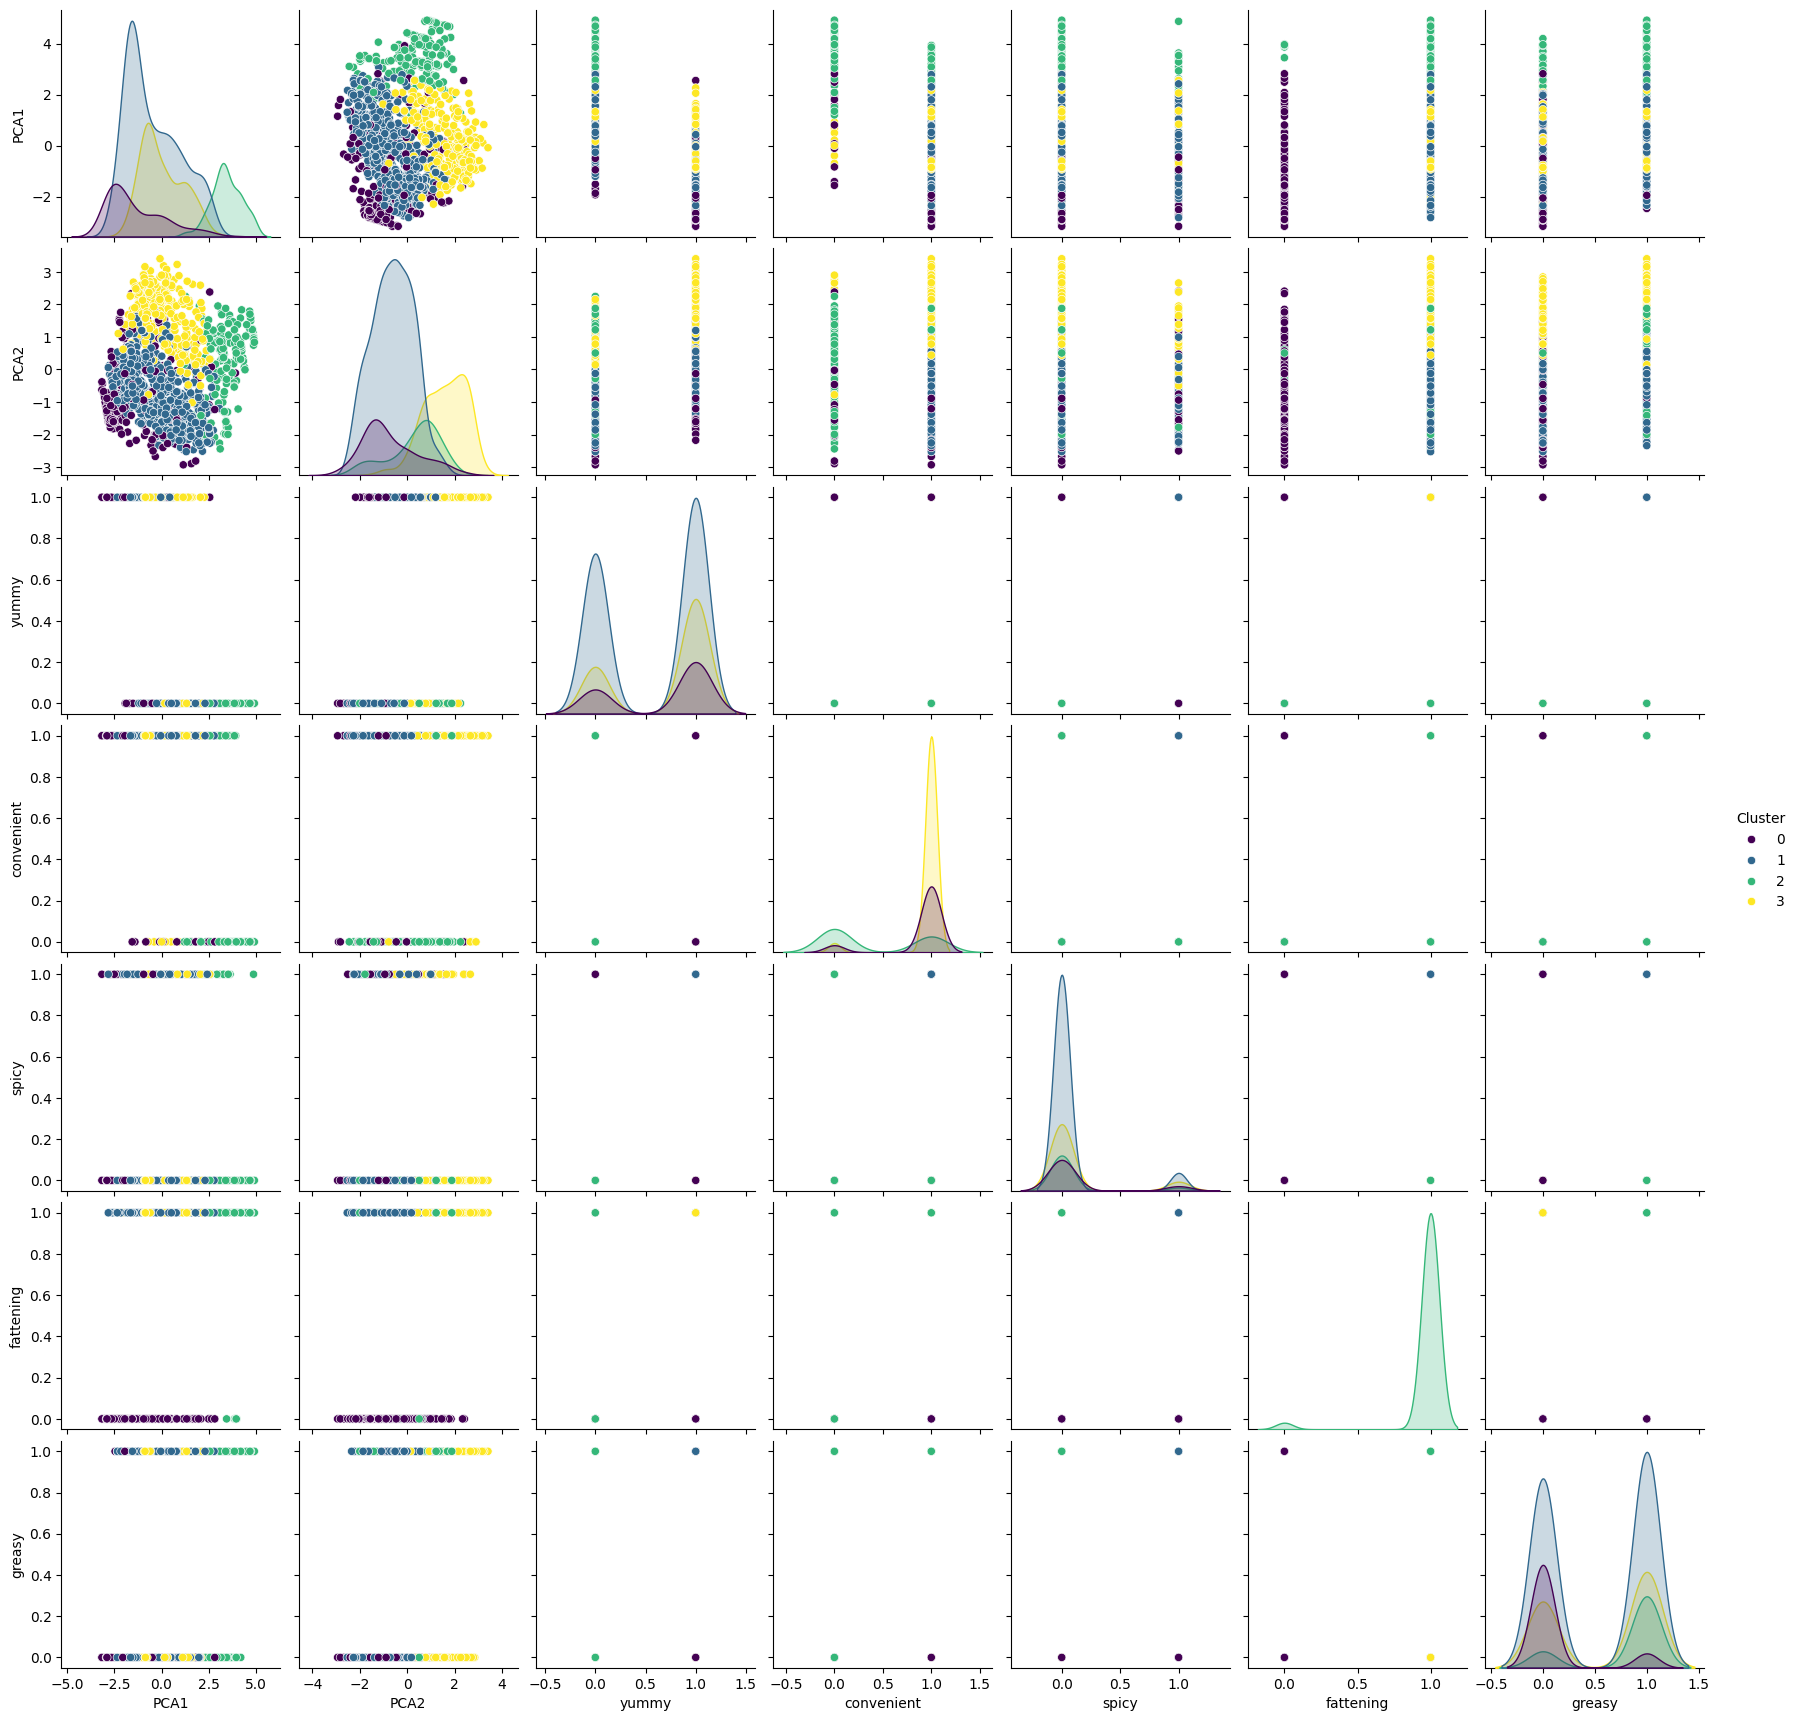

In [ ]:
# Add PCA components to segment_profiles DataFrame
segment_profiles['PCA1'] = pca_df_kmeans['PCA1']
segment_profiles['PCA2'] = pca_df_kmeans['PCA2']

# Now proceed with the subsetting
# Include 'Cluster' in the features for the pairplot
features_for_pairplot = ['PCA1', 'PCA2', 'Cluster'] + key_features
segment_profiles_subset = segment_profiles[features_for_pairplot]

# Pair plot
sns.pairplot(segment_profiles_subset, hue='Cluster', palette="viridis")
plt.show()

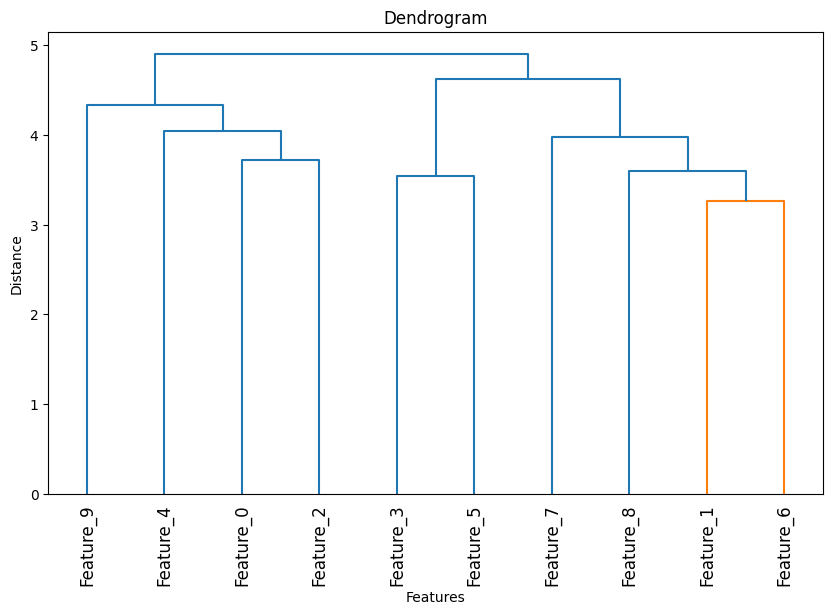

<ipython-input-37-d5578322fd18>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


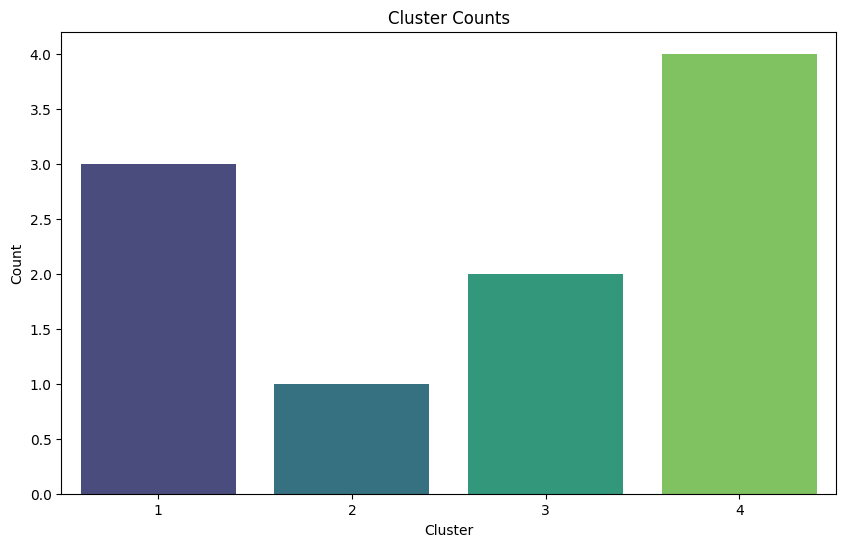

"\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4, palette='viridis', s=100)\nplt.title('PCA Plot with Clusters')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.legend(title='Cluster')\nplt.show()\n\n# Step 6: Project Axes on PCA plot\nfor i in range(len(MD_x.columns)):\n    plt.arrow(0, 0, MD_pca[i, 0] * 0.1, MD_pca[i, 1] * 0.1,\n              color='gray', alpha=0.5,\n              head_width=0.1, head_length=0.1)\n\nplt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.title('PCA Plot with Projected Axes')\nplt.grid()\nplt.show()\n"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

# Step 1: Simulate some example data for MD.x
np.random.seed(0)  # For reproducibility
num_samples = 100
num_features = 10

# Create a random DataFrame (replace this with your actual data loading)
MD_x = pd.DataFrame(np.random.rand(num_samples, num_features),
                    columns=[f'Feature_{i}' for i in range(num_features)])

# Step 2: Perform hierarchical clustering
MD_x_transposed = MD_x.T  # Transpose the data
dist_matrix = pdist(MD_x_transposed)  # Calculate distance matrix
MD_vclust = linkage(dist_matrix, method='ward')  # Perform hierarchical clustering

# Step 3: Create cluster assignments using a method, e.g., fcluster
from scipy.cluster.hierarchy import fcluster

# Create clusters (for example, using 4 clusters)
MD_k4 = fcluster(MD_vclust, t=4, criterion='maxclust')

# Plot dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, labels=MD_x.columns, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Step 4: Create a bar chart of cluster sizes
cluster_counts = pd.Series(MD_k4).value_counts().sort_index()

# Plot bar chart of clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Step 5: Project PCA and plot the results
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)  # Perform PCA
'''
plt.figure(figsize=(10, 6))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4, palette='viridis', s=100)
plt.title('PCA Plot with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 6: Project Axes on PCA plot
for i in range(len(MD_x.columns)):
    plt.arrow(0, 0, MD_pca[i, 0] * 0.1, MD_pca[i, 1] * 0.1,
              color='gray', alpha=0.5,
              head_width=0.1, head_length=0.1)

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Projected Axes')
plt.grid()
plt.show()
'''

**Extracting segments Using Mixtures of Distributions**

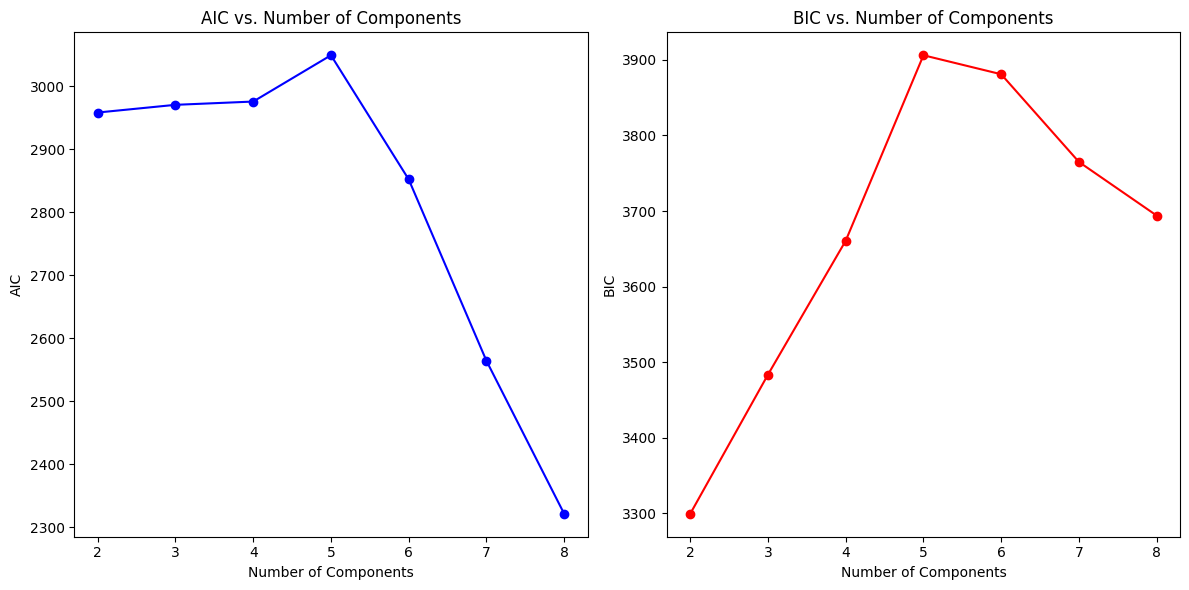

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming MD_x is your original DataFrame
# Scale the data (important for GMM)
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)  # Scale the original data, not the transposed one

# Fit Gaussian Mixture Models
n_components_range = range(2, 9)
models = {}
aic_values = []
bic_values = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(MD_x_scaled)  # Fit on the scaled original data

    aic_values.append(gmm.aic(MD_x_scaled))
    bic_values.append(gmm.bic(MD_x_scaled))
    models[n_components] = gmm

# Plot AIC and BIC values
plt.figure(figsize=(12, 6))

# Plot AIC values
plt.subplot(1, 2, 1)
plt.plot(n_components_range, aic_values, marker='o', linestyle='-', color='b')
plt.title('AIC vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('AIC')

# Plot BIC values
plt.subplot(1, 2, 2)
plt.plot(n_components_range, bic_values, marker='o', linestyle='-', color='r')
plt.title('BIC vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC')

plt.tight_layout()
plt.show()


In [ ]:

# Select the model with k=4
MD_m4 = models[4]

# Get predicted clusters from KMeans (assuming MD.k4 is your KMeans model)
# For demonstration here, I'll assume you are using k=5 from KMeans already fitted
from sklearn.cluster import KMeans

# Perform KMeans clustering (example code for KMeans)
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x_scaled)

# Create a DataFrame to hold the cluster assignments
kmeans_df = pd.DataFrame({'KMeans_Cluster': kmeans_labels})

# Create a DataFrame with the GMM clusters
gmm_labels = MD_m4.predict(MD_x_scaled)
gmm_df = pd.DataFrame({'GMM_Cluster': gmm_labels})

# Combine the two DataFrames
combined_df = pd.concat([kmeans_df, gmm_df], axis=1)

# Generate a contingency table for KMeans vs GMM clusters
contingency_table = pd.crosstab(combined_df['KMeans_Cluster'], combined_df['GMM_Cluster'])
print(contingency_table)

# Get the log-likelihood for the GMM model
log_likelihood_m4 = MD_m4.score(MD_x_scaled) # This gives the average log-likelihood value
print("Log-Likelihood for GMM with k=4:", log_likelihood_m4)

GMM_Cluster      0  1   2   3
KMeans_Cluster               
0                1  1   1   8
1                2  8   5   3
2                3  8  15   0
3               14  4   1   0
4                9  3   2  12
Log-Likelihood for GMM with k=4: -12.247577177884233


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Selecting (the) Target Segment(s)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


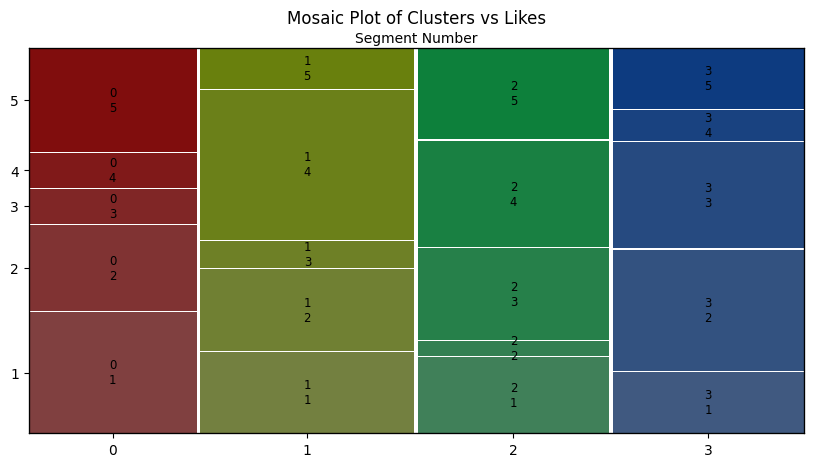

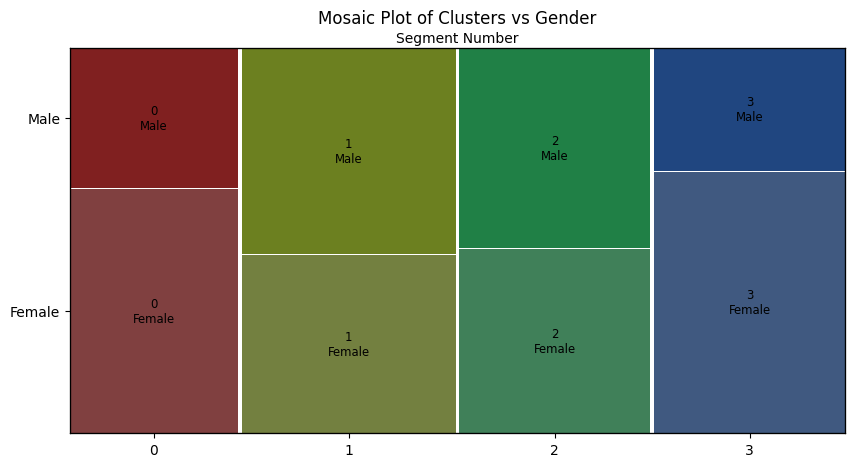

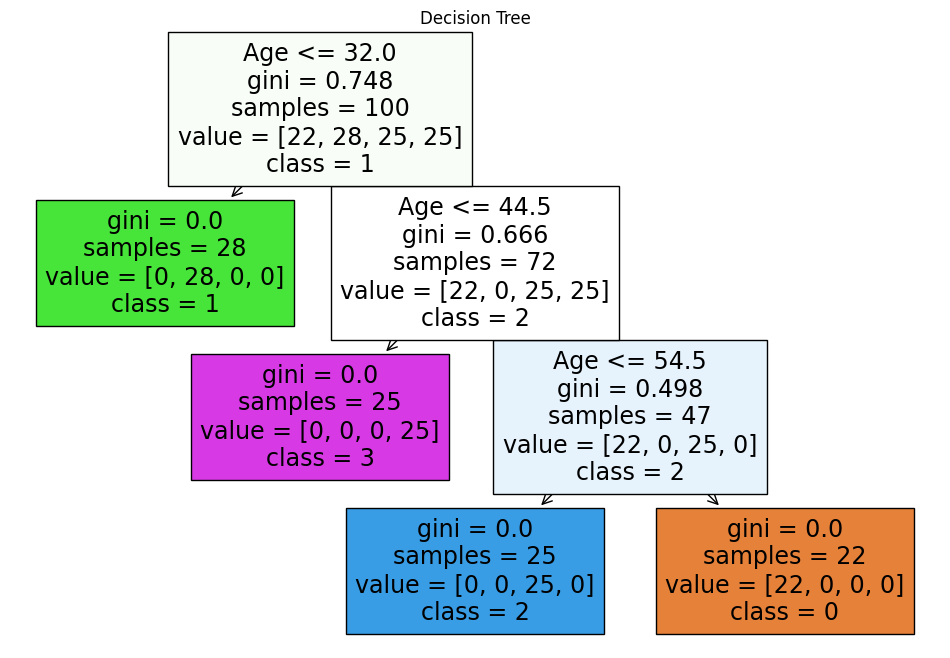

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic

# Step 1: Simulate example data for `mcdonalds`
np.random.seed(0)
num_samples = 100

# Simulate a dataset similar to `mcdonalds`
mcdonalds = pd.DataFrame({
    'Like': np.random.randint(1, 6, size=num_samples),  # Assuming 'Like' values between 1 to 5
    'Gender': np.random.choice(['Female', 'Male'], size=num_samples),
    'Age': np.random.randint(18, 65, size=num_samples),
    'VisitFrequency': np.random.randint(1, 10, size=num_samples),
})

# Create the 'Like.n' column for derived variable
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Step 2: Create clusters
kmeans = KMeans(n_clusters=4, random_state=0)
mcdonalds['k4'] = kmeans.fit_predict(mcdonalds[['Like.n', 'Age', 'VisitFrequency']])

# Step 3: Create contingency tables for mosaic plots
k4_crosstab_like = pd.crosstab(mcdonalds['k4'], mcdonalds['Like'])
k4_crosstab_gender = pd.crosstab(mcdonalds['k4'], mcdonalds['Gender'])

# Step 4: Mosaic plots
plt.figure(figsize=(10, 5))
mosaic(k4_crosstab_like.stack(), title='Mosaic Plot of Clusters vs Likes', ax=plt.gca())
plt.xlabel('Segment Number')
plt.ylabel('Like Count')
plt.show()

plt.figure(figsize=(10, 5))
mosaic(k4_crosstab_gender.stack(), title='Mosaic Plot of Clusters vs Gender', ax=plt.gca())
plt.xlabel('Segment Number')
plt.ylabel('Gender Count')
plt.show()

# Step 5: Prepare data for the decision tree
# Encode the categorical variables
label_encoder = LabelEncoder()
mcdonalds['Gender_encoded'] = label_encoder.fit_transform(mcdonalds['Gender'])

# Decision Tree Model
tree = DecisionTreeClassifier()
tree.fit(mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded']], mcdonalds['k4'])

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded'], class_names=['0', '1', '2', '3'], filled=True)
plt.title('Decision Tree')
plt.show()

# Step 6: Calculate visitation and likes means
visit = mcdonalds.groupby('k4')['VisitFrequency'].mean()
like = mcdonalds.groupby('k4')['Like.n'].mean()
female = mcdonalds.groupby('k4')['Gender'].apply(lambda x: (x == 'Female').mean())


